In [1]:
import json
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zande\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [69]:
# Plot models with all ambulance settings

def plot_repsonse_times(data, description):
    for model in sorted(data.keys()):        
        print(model, "mean response times")
        plt.figure(figsize=(12,5))

        for amb_setting in sorted(data[model].keys()):        

            # Histogram
            #bins = np.linspace(0, 30, 60)
            #plt.hist(data[model][amb_setting], bins, density=True, alpha=0.5, label= str(model + ': ' + amb_setting))

            # Density plot
            sns.distplot(data[model][amb_setting], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label= str(model + ': ' + amb_setting))

            print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")

        plt.legend(loc='upper right')
        plt.xlabel("Response Time (min)")
        plt.ylabel("Density")
        plt.title(model + " (" + description + ")")
        plt.xlim([0, 40])
        plt.show()
    

In [3]:
# Combined plot to compare two models

def compare_models(data):
    # Stochastic vs Robust combined

    plt.figure(figsize=(12,5))

    # Stochastic
    model = 'Stochastic'
    print(model, "mean response times")
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) < 35):
            continue

        # Density plot
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label= str(model + ': ' + amb_setting))

        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")


    # Robust
    model = 'Robust01'
    print()
    print(model, "mean response times")
    for amb_setting in sorted(data[model].keys()):
        
        # Skip low amb settings
        if(int(amb_setting) < 35):
            continue
        
        # Density plot
        sns.distplot(data[model][amb_setting], hist = False, kde = True,
                 kde_kws = {'linewidth': 2, 'linestyle':'--'},
                 label= str(model + ': ' + amb_setting))

        print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")


    plt.legend(loc='upper right')
    plt.xlabel("Response Time (min)")
    plt.ylabel("Density")
    plt.title("Stochastic vs Robust Comparison")
    plt.xlim([0, 40])
    plt.show()
    

## Original Response Times

In [4]:
with open('inputs/og_response_times.json') as f:
    original_data = json.load(f)

print(original_data.keys())

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.208499999999999 mins
35 --> 10.628 mins
40 --> 8.609666666666667 mins
45 --> 10.26033333333333 mins


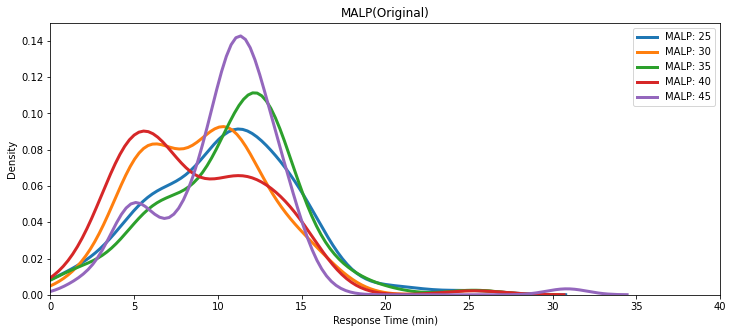

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 8.244833333333332 mins
45 --> 7.8536666666666655 mins


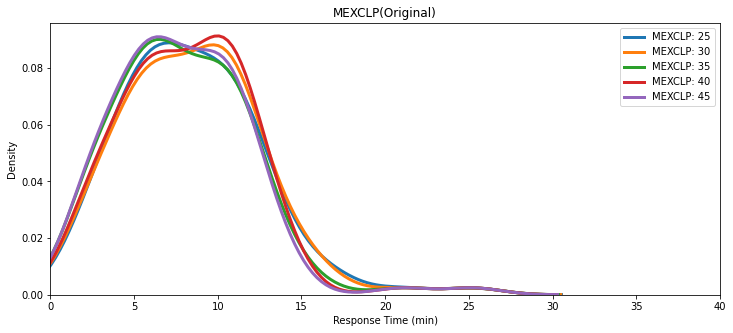

Robust00001 mean response times
25 --> 7.3340000000000005 mins
30 --> 7.177333333333333 mins
35 --> 7.060833333333332 mins
40 --> 6.675666666666668 mins
45 --> 6.3565 mins


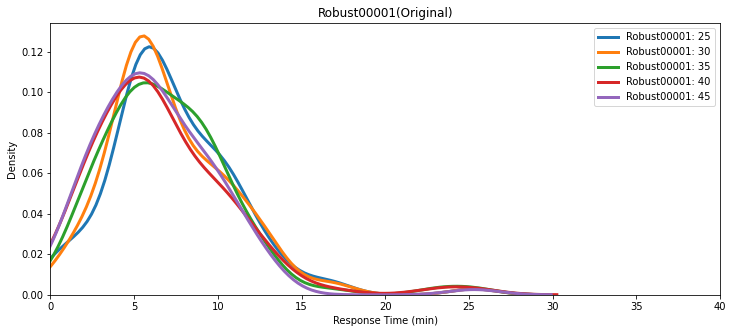

Robust0001 mean response times
25 --> 6.988833333333335 mins
30 --> 6.3963333333333345 mins
35 --> 6.0035 mins
40 --> 6.3020000000000005 mins
45 --> 6.959666666666668 mins


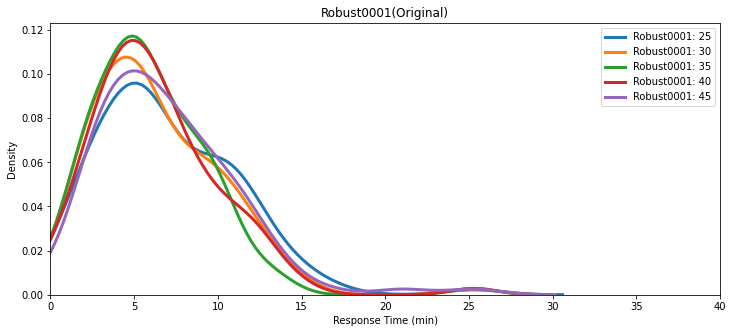

Robust001 mean response times
25 --> 7.635 mins
30 --> 6.6245 mins
35 --> 5.818333333333333 mins
40 --> 6.740666666666667 mins
45 --> 5.448 mins


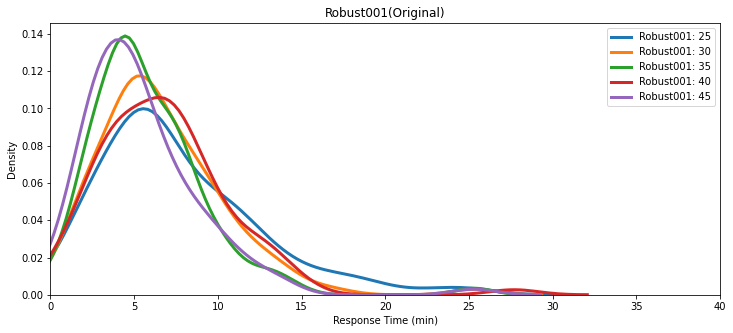

Robust005 mean response times
25 --> 7.560333333333333 mins
30 --> 7.208500000000002 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


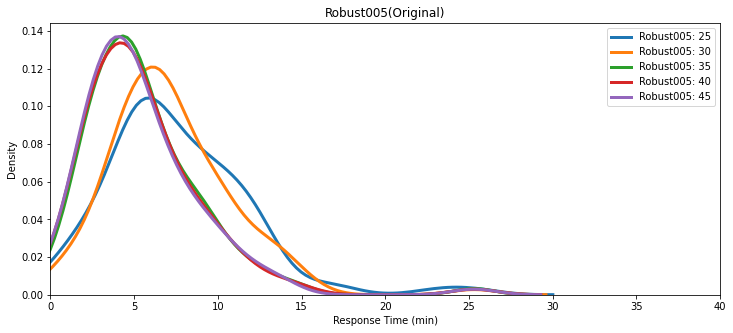

Robust01 mean response times
25 --> 7.213166666666667 mins
30 --> 6.0218333333333325 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


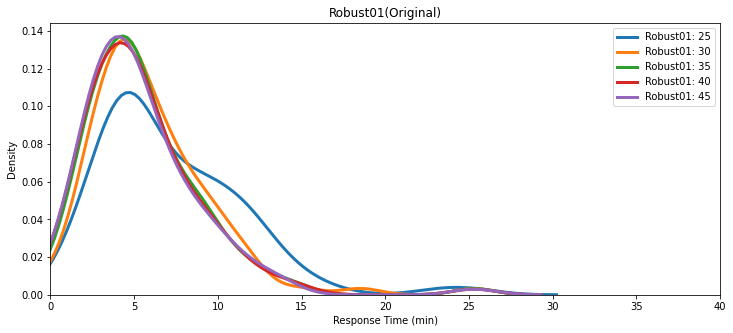

Stochastic mean response times
25 --> 7.505166666666665 mins
30 --> 6.510333333333333 mins
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins


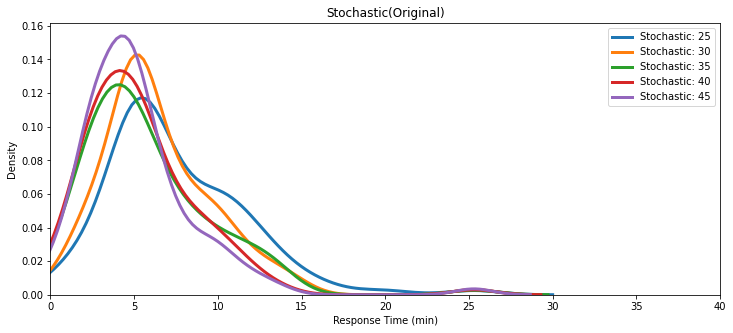

In [5]:
plot_repsonse_times(original_data, "Original")

Stochastic mean response times
35 --> 5.808000000000001 mins
40 --> 5.386000000000001 mins
45 --> 5.151333333333334 mins

Robust01 mean response times
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


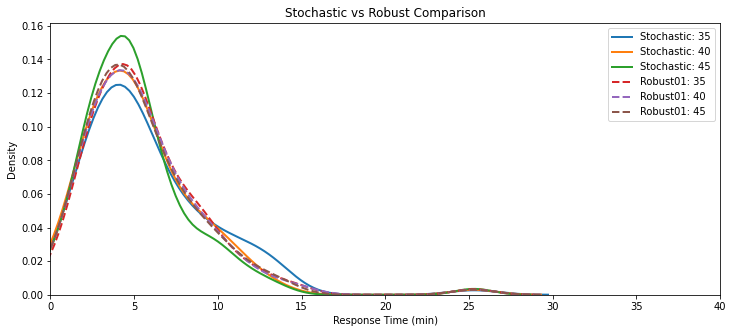

In [6]:
compare_models(original_data)

## New Response Times after Update

In [7]:
with open('inputs/response_times.json') as f:
    data = json.load(f)

print(data.keys())

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])


MALP mean response times
25 --> 10.352666666666666 mins
30 --> 9.027833333333332 mins
35 --> 11.118166666666665 mins
40 --> 9.625499999999999 mins
45 --> 10.26033333333333 mins


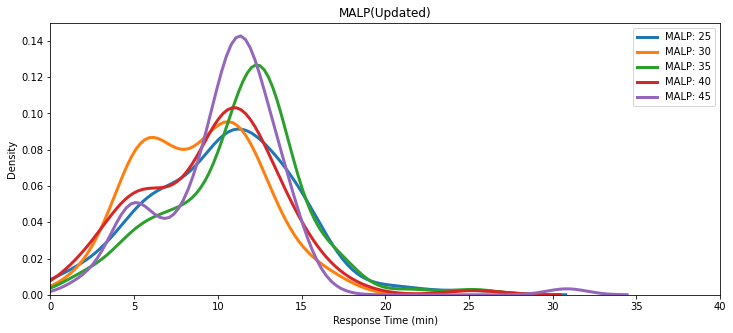

MEXCLP mean response times
25 --> 8.474 mins
30 --> 8.527666666666667 mins
35 --> 7.986333333333332 mins
40 --> 7.8536666666666655 mins
45 --> 7.751666666666665 mins


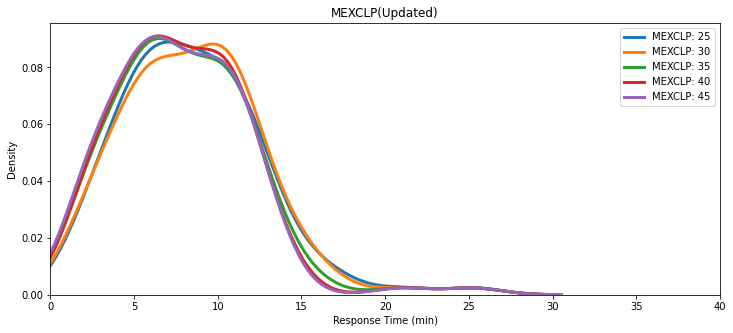

Robust00001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


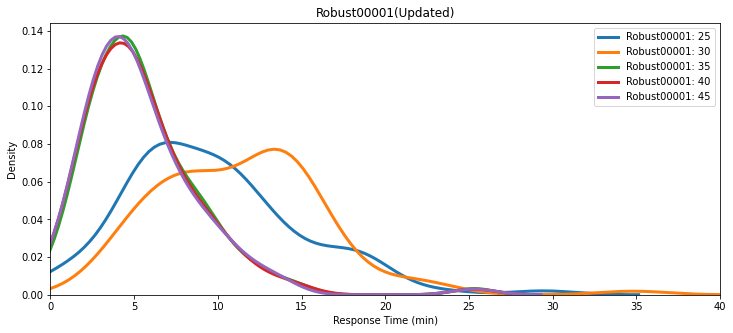

Robust0001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


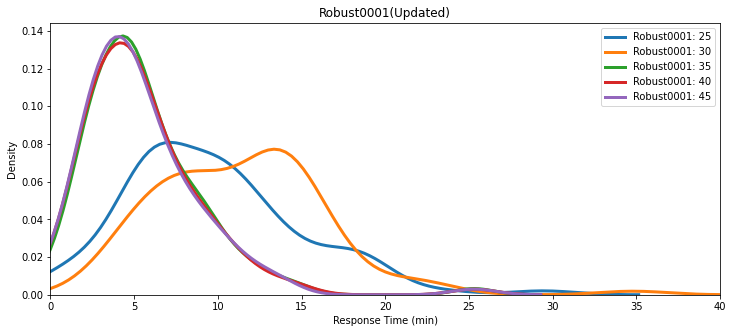

Robust001 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


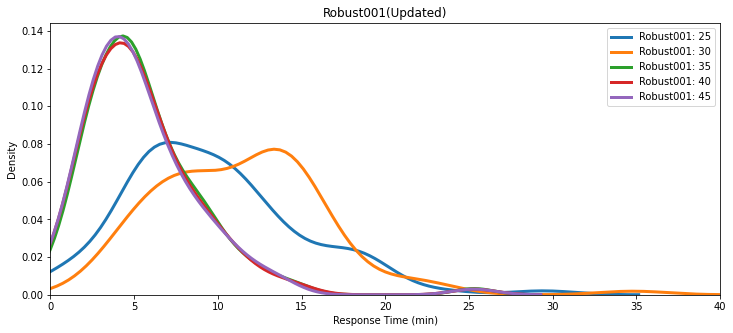

Robust005 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


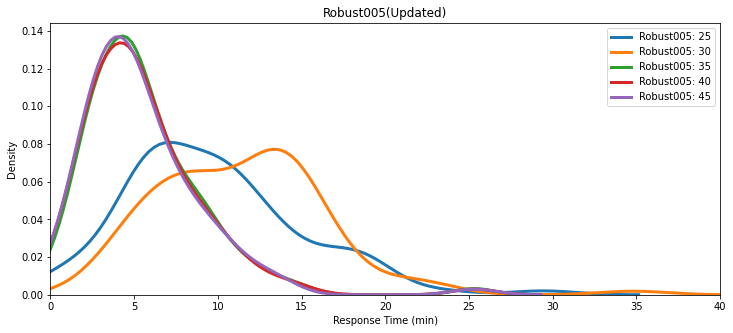

Robust01 mean response times
25 --> 9.707333333333333 mins
30 --> 11.42 mins
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


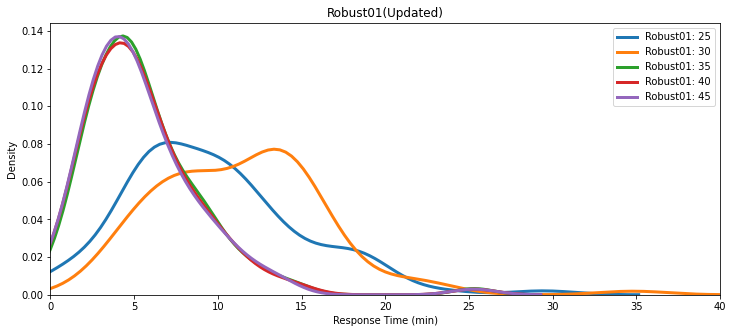

Stochastic mean response times
25 --> 6.8245 mins
30 --> 6.3125 mins
35 --> 6.161666666666667 mins
40 --> 5.612 mins
45 --> 5.440500000000001 mins


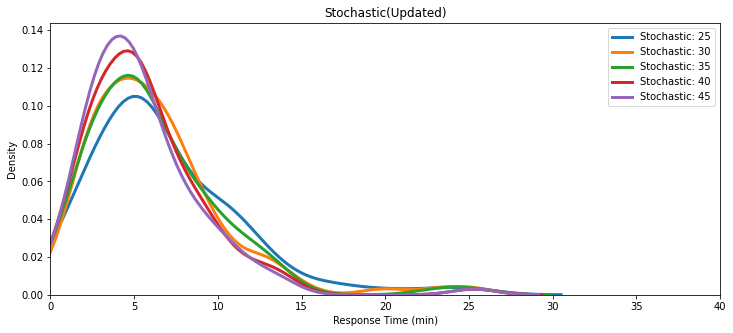

In [8]:
plot_repsonse_times(data, "Updated")

Stochastic mean response times
35 --> 6.161666666666667 mins
40 --> 5.612 mins
45 --> 5.440500000000001 mins

Robust01 mean response times
35 --> 5.593833333333333 mins
40 --> 5.508333333333334 mins
45 --> 5.448 mins


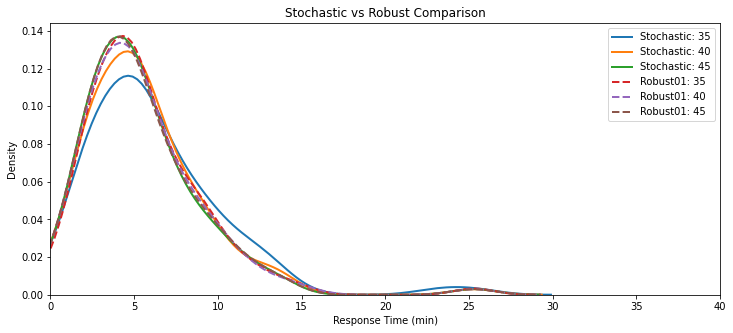

In [9]:
compare_models(data)

## Austin Response Times

In [10]:
with open('inputs/austin_response_times.json') as f:
    austin_data = json.load(f)

print(austin_data.keys())

# Scale seconds to minutes
for model in austin_data.keys():
    for amb_setting in austin_data[model]:
        filtered = list(filter(None, austin_data[model][amb_setting])) 
        austin_data[model][amb_setting] = [x/60 for x in filtered]
        
print(austin_data['MALP']['40'])

dict_keys(['Stochastic', 'MEXCLP', 'Robust001', 'Robust005', 'Robust01', 'MALP', 'Robust0001', 'Robust00001'])
[21.582222222222224, 24.951666666666664, 24.449444444444445, 40.82888888888888, 10.0, 10.0, 49.068333333333335, 10.0, 30.53638888888889, 19.22111111111111, 19.22111111111111, 24.399444444444445, 20.179444444444446, 10.0, 20.179444444444446, 20.96055555555556, 18.95138888888889, 10.0, 10.0, 10.0, 30.98472222222222, 36.64, 10.0, 12.462777777777777, 10.0, 30.53638888888889, 19.533333333333335, 45.638333333333335, 33.034166666666664, 24.897777777777776, 35.693333333333335, 37.363888888888894, 5.0, 28.356111111111108, 9.766666666666667, 15.868055555555555, 5.0, 5.0, 45.638333333333335, 16.54, 9.758055555555556, 10.48027777777778, 5.0, 5.0, 11.919722222222221, 94.43333333333334, 38.76472222222222, 15.24638888888889, 17.374166666666667, 18.125555555555554, 5.0, 8.41638888888889, 13.383888888888889, 11.058055555555557, 9.766666666666667, 57.41, 10.0, 5.0, 5.0, 5.0, 11.697777777777778,

MALP mean response times
30 --> 18.15675 mins
35 --> 18.52777222222222 mins
40 --> 18.974649999999997 mins
45 --> 20.3563 mins
50 --> 19.903444444444442 mins


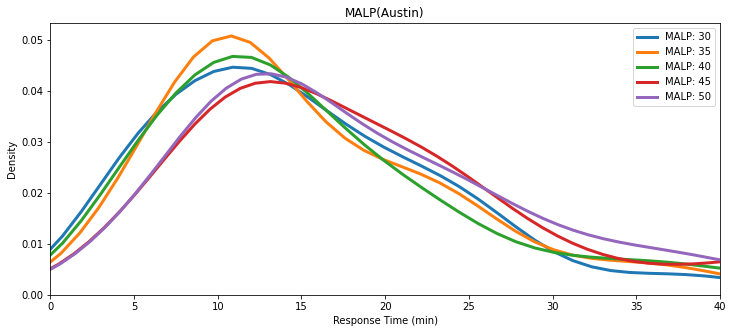

MEXCLP mean response times
30 --> 17.963397222222223 mins
35 --> 20.2204 mins
40 --> 20.41882777777778 mins
45 --> 20.163241666666668 mins
50 --> 20.643066666666662 mins


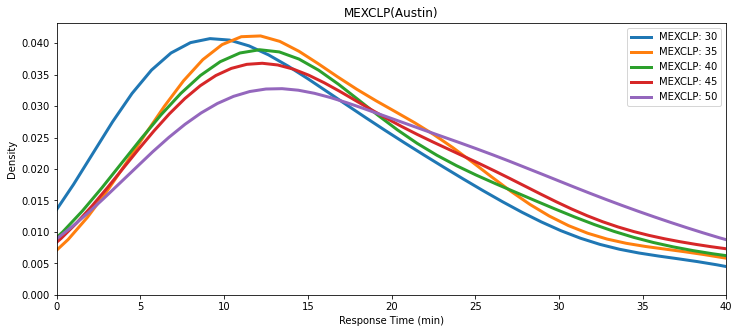

Robust00001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


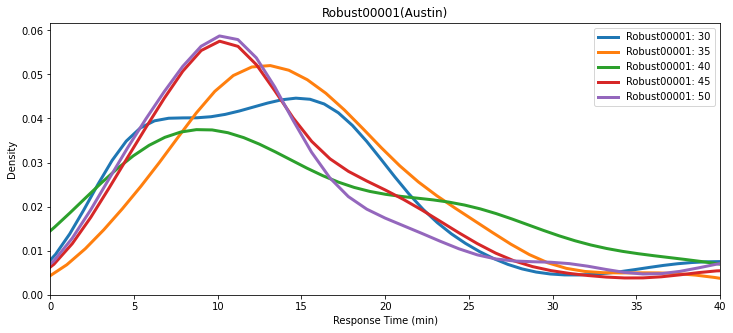

Robust0001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


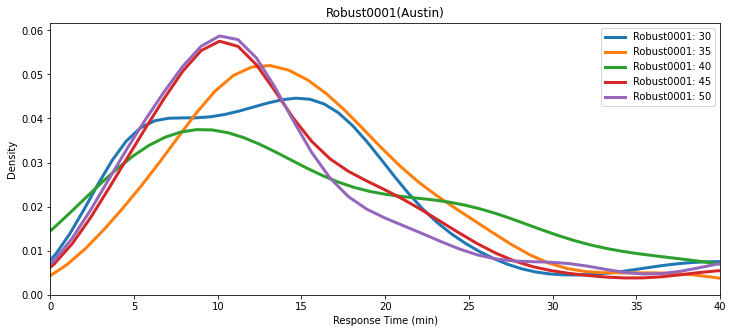

Robust001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


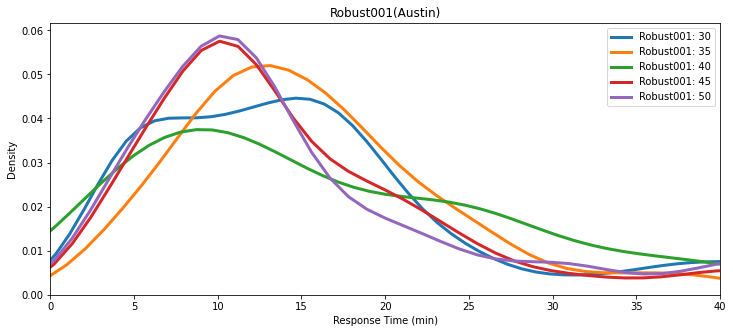

Robust005 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


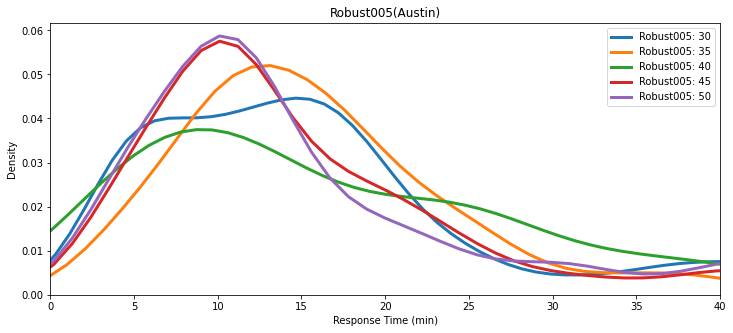

Robust01 mean response times
30 --> 18.26509722222222 mins
35 --> 20.48952222222222 mins
40 --> 18.505680555555557 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


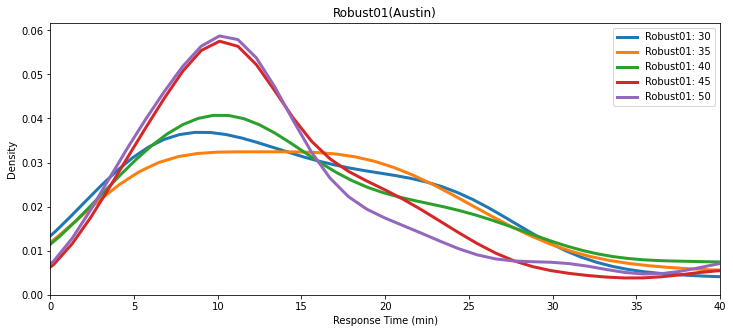

Stochastic mean response times
30 --> 17.880855555555556 mins
35 --> 19.514816666666665 mins
40 --> 20.17783163265306 mins
45 --> 20.204619444444443 mins
50 --> 19.9044 mins


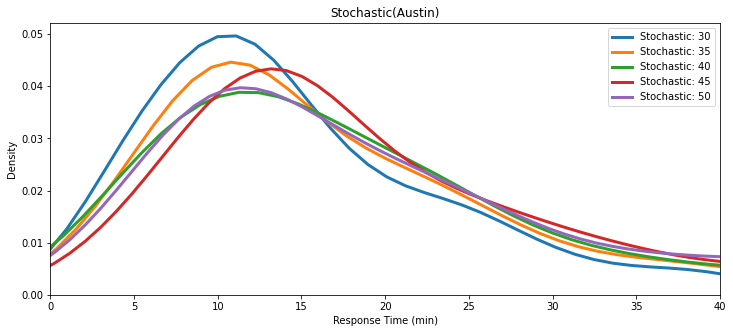

In [11]:
plot_repsonse_times(austin_data, "Austin")

Stochastic mean response times
35 --> 19.514816666666665 mins
40 --> 20.17783163265306 mins
45 --> 20.204619444444443 mins
50 --> 19.9044 mins

Robust01 mean response times
35 --> 20.48952222222222 mins
40 --> 18.505680555555557 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


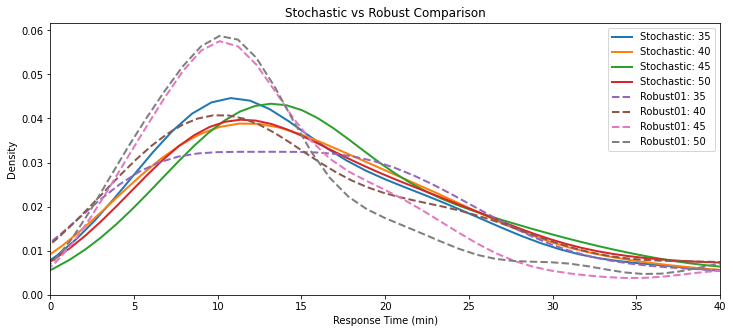

In [12]:
compare_models(austin_data)

In [68]:
print(None in austin_data["Robust00001"]['40'])
print(min(austin_data["MALP"]['30']))

False
5.0


MALP mean response times
30 --> 18.15675 mins
35 --> 18.52777222222222 mins
40 --> 18.974649999999997 mins
45 --> 20.3563 mins
50 --> 19.903444444444442 mins


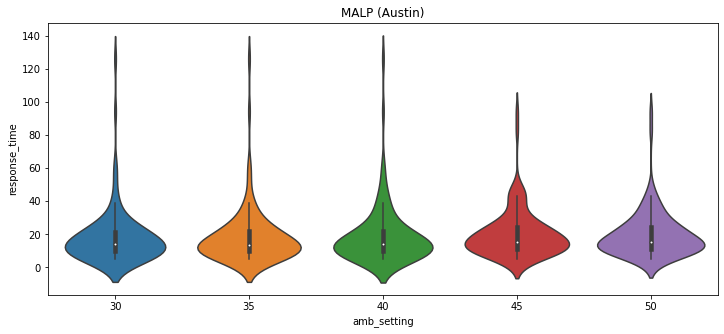

MEXCLP mean response times
30 --> 17.963397222222223 mins
35 --> 20.2204 mins
40 --> 20.41882777777778 mins
45 --> 20.163241666666668 mins
50 --> 20.643066666666662 mins


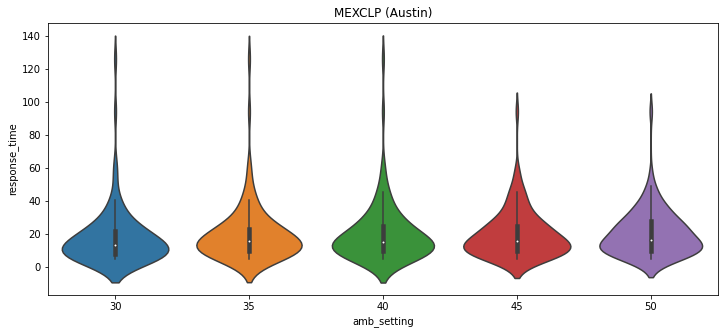

Robust00001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


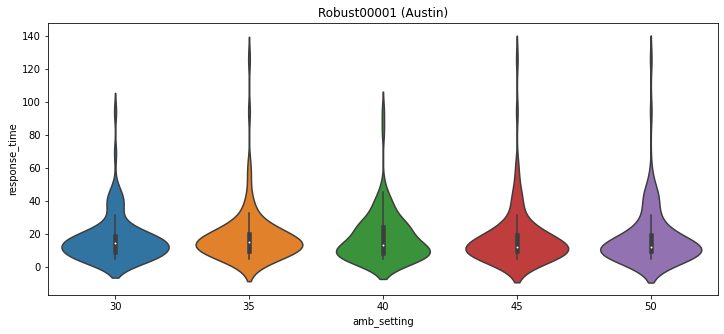

Robust0001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


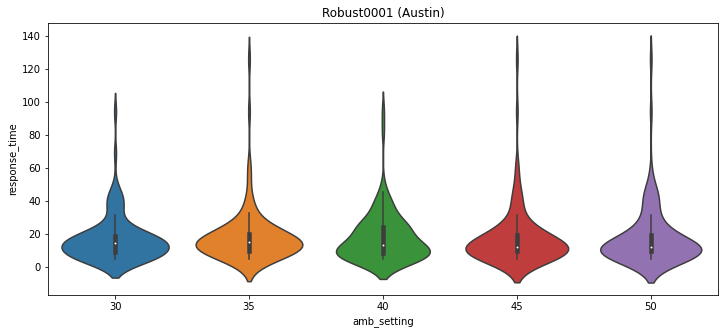

Robust001 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


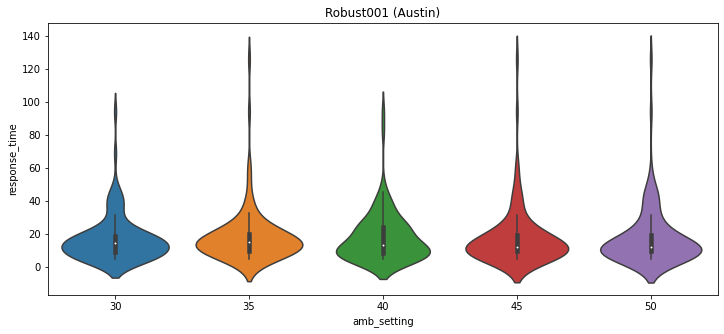

Robust005 mean response times
30 --> 17.269358333333333 mins
35 --> 18.799075 mins
40 --> 18.09816437571592 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


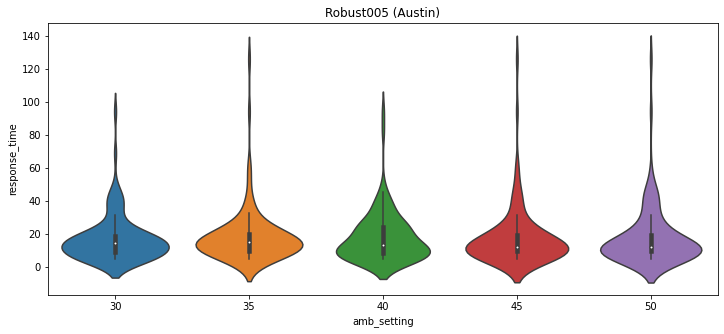

Robust01 mean response times
30 --> 18.26509722222222 mins
35 --> 20.48952222222222 mins
40 --> 18.505680555555557 mins
45 --> 17.864575 mins
50 --> 18.0083 mins


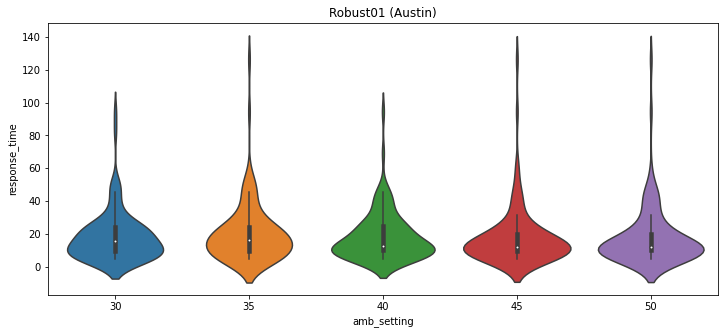

Stochastic mean response times
30 --> 17.880855555555556 mins
35 --> 19.514816666666665 mins
40 --> 20.17783163265306 mins
45 --> 20.204619444444443 mins
50 --> 19.9044 mins


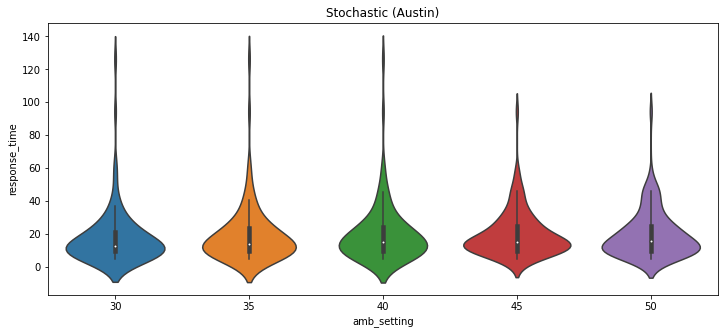

In [71]:
# Violin plot

def violin_plot_response_times(data, description):
    for model in sorted(data.keys()):        
        
        times = []
        amb_settings = []
        
        print(model, "mean response times")
        for amb_setting in sorted(data[model].keys()):        
            print(amb_setting, "-->", np.mean(data[model][amb_setting]), "mins")

            # Prepare matrix
            times.append(data[model][amb_setting])
            amb_settings.append([amb_setting for x in data[model][amb_setting]])
            
        
        # Flatten
        flat_amb_settings = []
        for sublist in amb_settings:
            for item in sublist:
                flat_amb_settings.append(item)
        
        flat_times = []
        for sublist in times:
            for item in sublist:
                flat_times.append(item)
        
        
        # Create df
        df = pd.DataFrame()
        df['amb_setting'] = flat_amb_settings
        df['response_time'] = flat_times
        
        
        # Violin plot
        plt.figure(figsize=(12,5))
        sns.violinplot(x='amb_setting', y='response_time', data=df)

        plt.title(model + " (" + description + ")")
        plt.show()


violin_plot_response_times(austin_data, "Austin")

## Compare to trivial

In [75]:
trivial_times = [600.0, 1497.1, 600.0, 2449.733333333333, 600.0, 600.0, 2944.1, 600.0, 1900.9833333333333, 1153.2666666666667, 1153.2666666666667, 600.0, 600.0, 600.0, 600.0, 1153.2666666666667, 1137.0833333333333, 600.0, 1519.3666666666666, 1172.0, 1859.0833333333333, 600.0, 1710.45, 747.7666666666667, 1264.8833333333334, 2738.3, 1173.5833333333333, 1051.5833333333333, 600.0, 600.0, 2141.6, 855.2333333333333, 300.0, 2464.266666666667, 923.0833333333334, 600.0, 600.0, 600.0, 916.1, 300.0, 730.3, 576.6333333333333, 300.0, 832.9, 1493.8666666666666, 5666.0, 2325.883333333333, 600.0, 1042.45, 875.65, 923.0833333333334, 2535.0333333333333, 300.0, 576.6333333333333, 300.0, 3444.6, 600.0, 300.0, 300.0, 300.0, 996.75, 576.6333333333333, 607.9333333333333, 832.9, 949.0, 586.0, 1374.4666666666667, 759.6833333333333, 950.5, 3711.6833333333334, 300.0, 300.0, 729.4833333333333, 1363.45, 603.9, 1335.3166666666666, 300.0, 1335.3166666666666, 1517.9833333333333, 1051.5833333333333, 675.1, 926.4833333333333, 821.2333333333333, 607.9333333333333, 850.6833333333333, 667.4, 850.6833333333333, 300.0, 1070.8, 7577.233333333334, 576.6333333333333, 607.9333333333333, 719.2833333333333, 1466.7833333333333, 300.0, 546.0333333333333, 719.2833333333333, 821.2, 669.6833333333333, 300.0]
print(np.mean(trivial_times) / 60)


18.234350000000003


### Possible causes
- time matrix
- optimization and amb deployment
- simulation
- granularity of grid
- bad code / worng implementation
